## Visualizing Correlation between Features
We can visualize correlation between feature in a variety of ways two of the most popular ones are:
* seaborn.heatmap
* yellowbricks.target.FeatureCorrelation

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/diabetes.csv")
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
145,0,102,75,23,0,0.0,0.572,21,0
728,2,175,88,0,0,22.9,0.326,22,0
61,8,133,72,0,0,32.9,0.270,39,1
149,2,90,70,17,0,27.3,0.085,22,0
353,1,90,62,12,43,27.2,0.580,24,0


In [3]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 1. Using Seaborn Heatmap

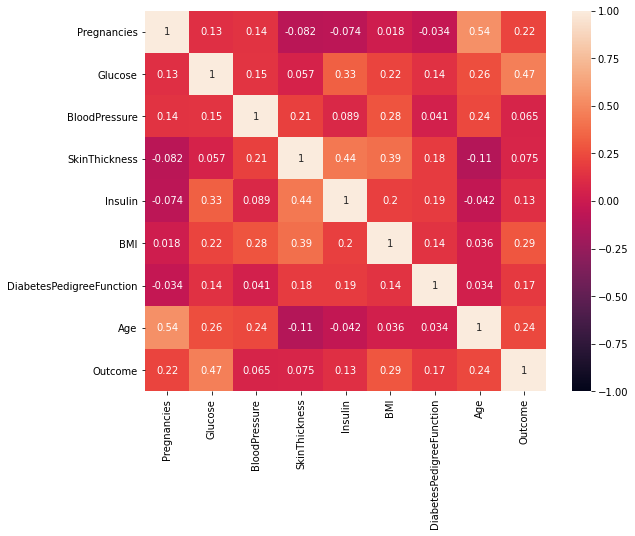

In [4]:
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, vmin=-1)

### 2. Using Yellowbrick.FeatureCorrelation
Here we will discuss two method of FeatureCorrelation:

1. pearson method
2. mutual_info-classification method

The **Pearson correlation** is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”.
Pearson correlations are suitable only for metric variables (which include dichotomous variables).
In our dataset, the **Pregnancies** feature is discrete, there Pearson correlation is not effective in calculating it's correclation with **Outcome**

<u>return value</u>: pearson's method returns 0 if no correlation, -1 if perfect negative correlation, +1 if perfect positive correlation.

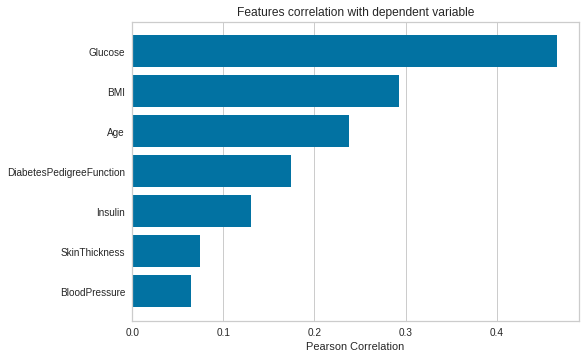

In [5]:
from yellowbrick.target import FeatureCorrelation

feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

vis_pearson = FeatureCorrelation(labels=feature_list, method = 'pearson', sort=True)
vis_pearson.fit(data[feature_list], data['Outcome'])
vis_pearson.poof()

**Mutual information** is a measure between two (possibly multi-dimensional) random variables and , that quantifies the amount of information obtained about one random variable, through the other random variable.

<u>return value</u>: mutual_info-classification method returns 0 if no correlation and non-zero otherwise.

In [6]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

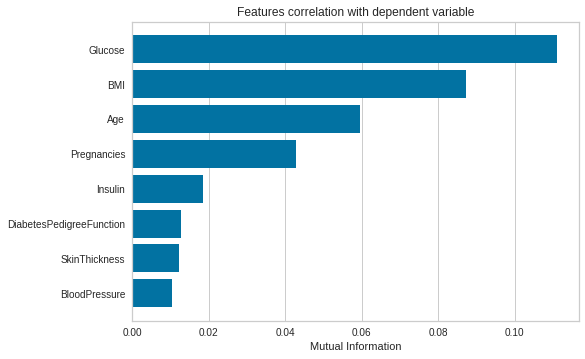

In [7]:
discrete_feat = [False for x in range(len(X.columns))]
discrete_feat[0] = True
vis_mic = FeatureCorrelation(labels=X.columns, method = 'mutual_info-classification', sort=True)
vis_mic.fit(X, y, discrete_features= discrete_feat, random_state=1)
vis_mic.poof()